In [1]:
!pip install shap
!pip install lightgbm
!pip install xgboost
!pip install imblearn
!pip install category_encoders
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00


In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import optuna
import shap
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [5]:
data = pd.read_csv('/content/SMOTETomek_data.csv')

In [6]:
data

,animal_type,age_group_intake,month_of_outcome,breed_type,color_group,intake_condition_group,has_name,age_days_outcome,los_at_shelter,is_fixed,outcome_group
0,Dog,Young Adult,February,Pure,Brown,Injured,0.000000,733.000000,1.000000,0.000000,Positive
1,Dog,Young Adult,February,Mix,Black,Healthy/Normal,1.000000,916.000000,1.000000,0.000000,Neutral
2,Cat,Puppy/Kitten,February,Pure,Red,Healthy/Normal,1.000000,176.000000,2.000000,1.000000,Positive
3,Other,Young Adult,February,Pure,Brown,Healthy/Normal,0.000000,732.000000,1.000000,0.000000,Negative
4,Cat,Young Adult,February,Pure,Brown,Healthy/Normal,1.000000,367.000000,1.000000,1.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
240528,Dog,Puppy/Kitten,March,Mix,White,Healthy/Normal,0.728891,60.000000,1.000000,0.000000,Neutral
240529,Cat,Adult,February,Pure,Black,Injured,0.000000,1831.656075,5.000000,0.000000,Neutral
240530,Dog,Puppy/Kitten,September,Pure,Black,Healthy/Normal,0.000000,66.000000,3.000000,0.000000,Neutral
240531,Other,Puppy/Kitten,September,Mix,White,Healthy/Normal,1.000000,209.105975,57.658963,0.482337,Neutral


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240533 entries, 0 to 240532
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   animal_type             240533 non-null  object 
 1   age_group_intake        240533 non-null  object 
 2   month_of_outcome        240533 non-null  object 
 3   breed_type              240533 non-null  object 
 4   color_group             240533 non-null  object 
 5   intake_condition_group  240533 non-null  object 
 6   has_name                240533 non-null  float64
 7   age_days_outcome        240533 non-null  float64
 8   los_at_shelter          240533 non-null  float64
 9   is_fixed                240533 non-null  float64
 10  outcome_group           240533 non-null  object 
dtypes: float64(4), object(7)
memory usage: 20.2+ MB


In [8]:
data.isnull().sum()

,0
animal_type,0
age_group_intake,0
month_of_outcome,0
breed_type,0
color_group,0
intake_condition_group,0
has_name,0
age_days_outcome,0
los_at_shelter,0
is_fixed,0


## Encoding Everything

Label Encoding Target and Age Progression

In [9]:
from sklearn.preprocessing import LabelEncoder

# Columns to Label Encode
label_encode_cols = ['age_group_intake', 'outcome_group']

# Dictionary to store Label Encoders for inverse transformation
label_encoders = {}

# Apply Label Encoding to each specified column
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Apply encoding
    label_encoders[col] = le  # Store encoder for future inverse transformation

# Display the first few rows of the label encoded columns
print("\nLabel Encoded Columns:")
print(data[label_encode_cols].head())



Label Encoded Columns:
   age_group_intake  outcome_group
0                 3              2
1                 3              1
2                 1              2
3                 3              0
4                 3              2


One hot encoding the nominal columns

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Columns to One-Hot Encode
one_hot_cols = ['animal_type', 'month_of_outcome', 'breed_type', 'color_group', 'intake_condition_group']

# One-Hot Encoder Setup
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), one_hot_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply One-Hot Encoding
encoded_data = encoder.fit_transform(data)

# Get Encoded Feature Names
encoded_feature_names = encoder.get_feature_names_out()

# Create DataFrame with Encoded Features
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=data.index)

print("\nOne-Hot Encoded DataFrame Head:")
print(encoded_df.head())



One-Hot Encoded DataFrame Head:
   onehot__animal_type_Cat  onehot__animal_type_Dog  \
0                      0.0                      1.0   
1                      0.0                      1.0   
2                      1.0                      0.0   
3                      0.0                      0.0   
4                      1.0                      0.0   

   onehot__animal_type_Livestock  onehot__animal_type_Other  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        1.0   
4                            0.0                        0.0   

   onehot__month_of_outcome_August  onehot__month_of_outcome_December  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0    

In [11]:
# Remove 'remainder__' Prefix from Column Names
encoded_df.columns = encoded_df.columns.str.replace('remainder__', '')

# Display the Updated Column Names
print("\nUpdated Column Names (Without 'remainder__'):")
print(encoded_df.columns.tolist())

# Check the First Few Rows to Ensure Everything is Intact
print("\nFirst Few Rows After Cleaning Column Names:")
print(encoded_df.head())



Updated Column Names (Without 'remainder__'):
['onehot__animal_type_Cat', 'onehot__animal_type_Dog', 'onehot__animal_type_Livestock', 'onehot__animal_type_Other', 'onehot__month_of_outcome_August', 'onehot__month_of_outcome_December', 'onehot__month_of_outcome_February', 'onehot__month_of_outcome_January', 'onehot__month_of_outcome_July', 'onehot__month_of_outcome_June', 'onehot__month_of_outcome_March', 'onehot__month_of_outcome_May', 'onehot__month_of_outcome_November', 'onehot__month_of_outcome_October', 'onehot__month_of_outcome_September', 'onehot__breed_type_Pure', 'onehot__color_group_Brown', 'onehot__color_group_Gold', 'onehot__color_group_Grey', 'onehot__color_group_Multicolor', 'onehot__color_group_Other', 'onehot__color_group_Red', 'onehot__color_group_Tricolor', 'onehot__color_group_White', 'onehot__intake_condition_group_Healthy/Normal', 'onehot__intake_condition_group_Injured', 'onehot__intake_condition_group_Life Stage/Developmental', 'onehot__intake_condition_group_Oth

# ==========================
# 🚀 Model Training & Hyperparameter Tuning
# ==========================

In [12]:
encoded_df

,onehot__animal_type_Cat,onehot__animal_type_Dog,onehot__animal_type_Livestock,onehot__animal_type_Other,onehot__month_of_outcome_August,onehot__month_of_outcome_December,onehot__month_of_outcome_February,onehot__month_of_outcome_January,onehot__month_of_outcome_July,onehot__month_of_outcome_June,...,onehot__intake_condition_group_Injured,onehot__intake_condition_group_Life Stage/Developmental,onehot__intake_condition_group_Other/Unknown,onehot__intake_condition_group_Sick/Medical,age_group_intake,has_name,age_days_outcome,los_at_shelter,is_fixed,outcome_group
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.000000,733.000000,1.000000,0.000000,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.000000,916.000000,1.000000,0.000000,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,176.000000,2.000000,1.000000,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.000000,732.000000,1.000000,0.000000,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.000000,367.000000,1.000000,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240528,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.728891,60.000000,1.000000,0.000000,1.0
240529,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,1831.656075,5.000000,0.000000,1.0
240530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,66.000000,3.000000,0.000000,1.0
240531,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,209.105975,57.658963,0.482337,1.0


In [13]:
# Sample 20% of the encoded_df
sampled_df = encoded_df.sample(frac=0.2, random_state=42)  # random_state for reproducibility

sampled_df


,onehot__animal_type_Cat,onehot__animal_type_Dog,onehot__animal_type_Livestock,onehot__animal_type_Other,onehot__month_of_outcome_August,onehot__month_of_outcome_December,onehot__month_of_outcome_February,onehot__month_of_outcome_January,onehot__month_of_outcome_July,onehot__month_of_outcome_June,...,onehot__intake_condition_group_Injured,onehot__intake_condition_group_Life Stage/Developmental,onehot__intake_condition_group_Other/Unknown,onehot__intake_condition_group_Sick/Medical,age_group_intake,has_name,age_days_outcome,los_at_shelter,is_fixed,outcome_group
235717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,375.000000,9.071400,1.000000,1.0
163712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,733.000000,1.000000,0.000000,0.0
188821,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,284.967805,13.562230,0.718885,0.0
12772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,118.000000,42.000000,1.000000,2.0
170666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1463.322017,2.322017,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,764.000000,24.000000,1.000000,2.0
93113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,78.000000,31.000000,1.000000,1.0
233432,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1852.859254,4.286418,1.000000,1.0
225837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,72.000000,11.149678,0.000000,1.0


In [14]:
X = sampled_df.drop('outcome_group', axis=1)
y = sampled_df['outcome_group']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification

Random Forest Classifier

In [15]:
def tune_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }
    rf_model = RandomForestClassifier(**params, random_state=42)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)
    return accuracy_score(y_test, preds)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(tune_rf, n_trials=30)
best_rf_params = study_rf.best_params
print("Best Random Forest Hyperparameters:", best_rf_params)

[I 2025-03-03 00:39:46,108] A new study created in memory with name: no-name-379dfead-3e65-4941-92fb-7ed025050784
[I 2025-03-03 00:39:46,975] Trial 0 finished with value: 0.6859280814799418 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6859280814799418.
[I 2025-03-03 00:39:55,799] Trial 1 finished with value: 0.7745790895863646 and parameters: {'n_estimators': 319, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7745790895863646.
[I 2025-03-03 00:39:58,884] Trial 2 finished with value: 0.6869673664518811 and parameters: {'n_estimators': 277, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7745790895863646.
[I 2025-03-03 00:40:09,633] Trial 3 finished with value: 0.7570151735605903 and parameters: {'n_estimators': 452, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 0

Best Random Forest Hyperparameters: {'n_estimators': 174, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1}


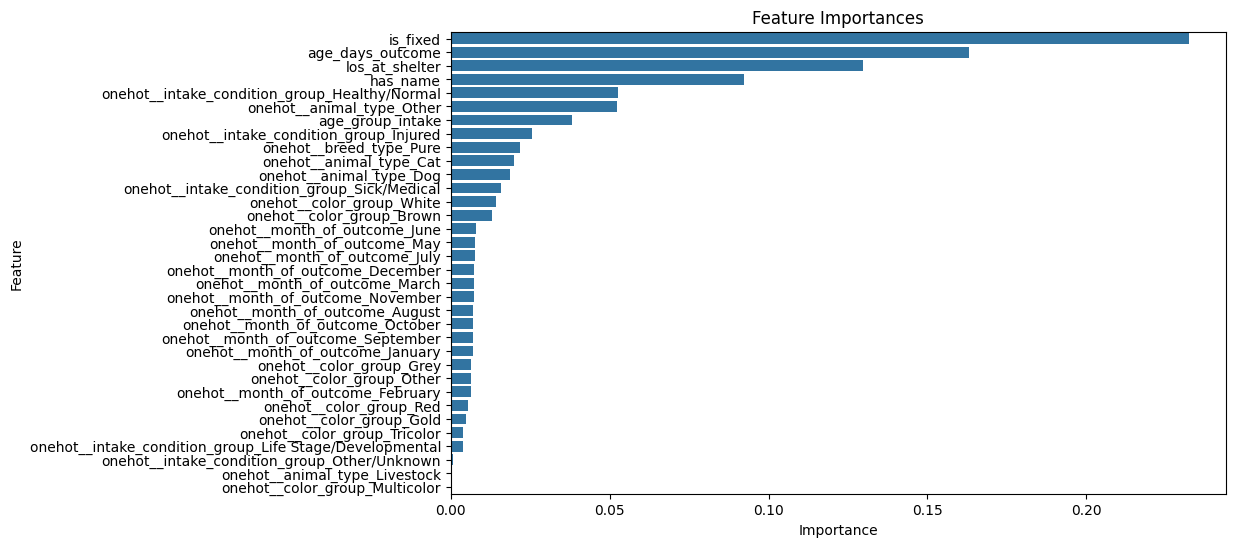

In [16]:
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

#feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


XGBoost Classifier

In [17]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Optuna Objective Function for Tuning XGBoost
def tune_xgb(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }
    model = XGBClassifier(**params, use_label_encoder=False, random_state=42, eval_metric='logloss')

    # Train on Already Defined Splits
    model.fit(X_train, y_train)

    # Predict and Evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Optuna Study for Hyperparameter Tuning
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(tune_xgb, n_trials=30)

# Best Hyperparameters
best_xgb_params = study_xgb.best_params
print("Best XGBoost Hyperparameters:", best_xgb_params)


[I 2025-03-03 00:42:43,319] A new study created in memory with name: no-name-d67d0ea3-d880-4e80-a9be-f1cb7e0983b0
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-03 00:42:44,273] Trial 0 finished with value: 0.7660569528164622 and parameters: {'learning_rate': 0.17200073374656125, 'n_estimators': 242, 'max_depth': 9, 'min_child_weight': 10, 'gamma': 2.6054267201400245, 'subsample': 0.61763663223896}. Best is trial 0 with value: 0.7660569528164622.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-03 00:42:45,361] Trial 1 finished with value: 0.7554562461026814 and parameters: {'learning_rate': 0.2959680897202356, 'n_estimators': 378, 'max_depth

Best XGBoost Hyperparameters: {'learning_rate': 0.43924978681535976, 'n_estimators': 173, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 0.050045804877533295, 'subsample': 0.6562434935218406}


In [18]:
import plotly.express as px
from xgboost import XGBClassifier
import pandas as pd

# Train the XGBClassifier Model with Best Parameters from Optuna
xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get Feature Importances and Create DataFrame
feature_importances = xgb_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by Importance in Descending Order
importances_df = importances_df.sort_values(by='Importance', ascending=True)  # Sort Ascending for Horizontal Bar Chart

# Create the Plotly Bar Chart
fig = px.bar(importances_df, x='Importance', y='Feature',
             orientation='h',  # Horizontal Bar Chart
             title='XGBoost Feature Importance',
             labels={'Importance': 'Importance Score', 'Feature': 'Feature Name'},
             color='Importance',  # Color by Importance for Better Visualization
             color_continuous_scale='Viridis'  # Color Scheme
            )

# Update Layout for Better Appearance
fig.update_layout(
    xaxis_title='Importance Score',
    yaxis_title='Feature Name',
    yaxis={'categoryorder': 'total ascending'},  # Ensure Proper Sorting
    title_x=0.5  # Center Title
)

fig.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:43:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LightGBM

In [19]:
def tune_lgbm(trial):
    params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'num_class': len(np.unique(y_train)),  # Number of classes in your target variable
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 20, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    #Set bagging_freq to 0 if boosting type is goss to disable bagging.
    if params['boosting_type'] == 'goss':
        params['bagging_freq'] = 0
        params['bagging_fraction'] = 1.0
    model = LGBMClassifier(**params, random_state=42, n_estimators=100) #Added n_estimators
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(tune_lgbm, n_trials=30) #Reduced n_trials for faster execution
best_lgbm_params = study_lgbm.best_params
print("Best LightGBM Hyperparameters:", best_lgbm_params)

[I 2025-03-03 00:43:50,747] A new study created in memory with name: no-name-c9a23722-3fc3-4cd4-8894-abade8f56439


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6104369510005433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6104369510005433
[LightGBM] [Warning] bagging_fraction is set=0.6196245277259782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6196245277259782
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6104369510005433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6104369510005433
[LightGBM] [Warning] bagging_fraction is set=0.6196245277259782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6196245277259782
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001632 seconds

[I 2025-03-03 00:43:56,155] Trial 0 finished with value: 0.8267511951777178 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 651, 'learning_rate': 0.2515658647889213, 'feature_fraction': 0.6104369510005433, 'bagging_fraction': 0.6196245277259782, 'bagging_freq': 2, 'min_child_samples': 26}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5734955871200184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5734955871200184
[LightGBM] [Warning] bagging_fraction is set=0.9330285962701671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9330285962701671
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5734955871200184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5734955871200184
[LightGBM] [Warning] bagging_fraction is set=0.9330285962701671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9330285962701671
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004553 seconds

[I 2025-03-03 00:43:59,065] Trial 1 finished with value: 0.821970484306797 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 246, 'learning_rate': 0.41545149102959794, 'feature_fraction': 0.5734955871200184, 'bagging_fraction': 0.9330285962701671, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8401601101363454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8401601101363454
[LightGBM] [Warning] bagging_fraction is set=0.5142532032740845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5142532032740845
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8401601101363454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8401601101363454
[LightGBM] [Warning] bagging_fraction is set=0.5142532032740845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5142532032740845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001660 seconds

[I 2025-03-03 00:43:59,859] Trial 2 finished with value: 0.794949075036375 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'learning_rate': 0.32486047976482646, 'feature_fraction': 0.8401601101363454, 'bagging_fraction': 0.5142532032740845, 'bagging_freq': 5, 'min_child_samples': 24}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8401601101363454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8401601101363454
[LightGBM] [Warning] bagging_fraction is set=0.5142532032740845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5142532032740845
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8893359023941474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8893359023941474
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.

[I 2025-03-03 00:44:00,880] Trial 3 finished with value: 0.7590937435044689 and parameters: {'boosting_type': 'goss', 'num_leaves': 51, 'learning_rate': 0.04300992969920757, 'feature_fraction': 0.8893359023941474, 'bagging_fraction': 0.5347022240422021, 'bagging_freq': 7, 'min_child_samples': 48}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8893359023941474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8893359023941474
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8381288004433589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8381288004433589
[LightGBM] [Warning] bagging_fraction is set=0.9843465646525943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9843465646525943

[I 2025-03-03 00:44:06,806] Trial 4 finished with value: 0.8087715651631677 and parameters: {'boosting_type': 'dart', 'num_leaves': 456, 'learning_rate': 0.26903725694371566, 'feature_fraction': 0.8381288004433589, 'bagging_fraction': 0.9843465646525943, 'bagging_freq': 4, 'min_child_samples': 93}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4537896970397073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4537896970397073
[LightGBM] [Warning] bagging_fraction is set=0.5725062492458193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5725062492458193
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4537896970397073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4537896970397073
[LightGBM] [Warning] bagging_fraction is set=0.5725062492458193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5725062492458193
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003997 seconds

[I 2025-03-03 00:44:09,543] Trial 5 finished with value: 0.8136562045312825 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 351, 'learning_rate': 0.26856449591010395, 'feature_fraction': 0.4537896970397073, 'bagging_fraction': 0.5725062492458193, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4537896970397073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4537896970397073
[LightGBM] [Warning] bagging_fraction is set=0.5725062492458193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5725062492458193
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5481238143103047, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5481238143103047
[LightGBM] [Warning] bagging_fraction is set=0.8221371405444872, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8221371405444872
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_f

[I 2025-03-03 00:44:11,859] Trial 6 finished with value: 0.8225940552899605 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 208, 'learning_rate': 0.1505423460753828, 'feature_fraction': 0.5481238143103047, 'bagging_fraction': 0.8221371405444872, 'bagging_freq': 3, 'min_child_samples': 6}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5481238143103047, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5481238143103047
[LightGBM] [Warning] bagging_fraction is set=0.8221371405444872, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8221371405444872
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7872225414643663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7872225414643663
[LightGBM] [Warning] bagging_fraction is set=0.5666185982952522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5666185982952522
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_f

[I 2025-03-03 00:44:17,248] Trial 7 finished with value: 0.8036790688006652 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 631, 'learning_rate': 0.04095792504049017, 'feature_fraction': 0.7872225414643663, 'bagging_fraction': 0.5666185982952522, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9398874442127496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9398874442127496
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9398874442127496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9398874442127496
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-03-03 00:44:19,284] Trial 8 finished with value: 0.7567033880690085 and parameters: {'boosting_type': 'goss', 'num_leaves': 371, 'learning_rate': 0.03311185062382833, 'feature_fraction': 0.9398874442127496, 'bagging_fraction': 0.7347219105777016, 'bagging_freq': 1, 'min_child_samples': 92}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9398874442127496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9398874442127496
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6306010884019905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6306010884019905
[LightGBM] [Warning] bagging_fraction is set=0.41927542576162236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.419275425761622

[I 2025-03-03 00:44:23,381] Trial 9 finished with value: 0.7946372895447932 and parameters: {'boosting_type': 'dart', 'num_leaves': 976, 'learning_rate': 0.4542231089577058, 'feature_fraction': 0.6306010884019905, 'bagging_fraction': 0.41927542576162236, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6306010884019905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6306010884019905
[LightGBM] [Warning] bagging_fraction is set=0.41927542576162236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41927542576162236
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6924136329163061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6924136329163061
[LightGBM] [Warning] bagging_fraction is set=0.7276895026277975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7276895026277975
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging

[I 2025-03-03 00:44:31,545] Trial 10 finished with value: 0.8085637081687799 and parameters: {'boosting_type': 'dart', 'num_leaves': 709, 'learning_rate': 0.16368892856623446, 'feature_fraction': 0.6924136329163061, 'bagging_fraction': 0.7276895026277975, 'bagging_freq': 2, 'min_child_samples': 33}. Best is trial 0 with value: 0.8267511951777178.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.48512957419531255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48512957419531255
[LightGBM] [Warning] bagging_fraction is set=0.8418457640847252, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8418457640847252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.48512957419531255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48512957419531255
[LightGBM] [Warning] bagging_fraction is set=0.8418457640847252, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8418457640847252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001743 sec

[I 2025-03-03 00:44:38,132] Trial 11 finished with value: 0.832259405528996 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 781, 'learning_rate': 0.15962578277392594, 'feature_fraction': 0.48512957419531255, 'bagging_fraction': 0.8418457640847252, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 11 with value: 0.832259405528996.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4121484586972336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4121484586972336
[LightGBM] [Warning] bagging_fraction is set=0.8325143506156599, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8325143506156599
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4121484586972336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4121484586972336
[LightGBM] [Warning] bagging_fraction is set=0.8325143506156599, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8325143506156599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004116 seconds

[I 2025-03-03 00:44:44,244] Trial 12 finished with value: 0.8343379754728747 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 838, 'learning_rate': 0.16239202319133017, 'feature_fraction': 0.4121484586972336, 'bagging_fraction': 0.8325143506156599, 'bagging_freq': 2, 'min_child_samples': 8}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.42768962730973875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42768962730973875
[LightGBM] [Warning] bagging_fraction is set=0.864337603439802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.864337603439802
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.42768962730973875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42768962730973875
[LightGBM] [Warning] bagging_fraction is set=0.864337603439802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.864337603439802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001639 seconds

[I 2025-03-03 00:44:51,636] Trial 13 finished with value: 0.8341301184784868 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 921, 'learning_rate': 0.15136454840703994, 'feature_fraction': 0.42768962730973875, 'bagging_fraction': 0.864337603439802, 'bagging_freq': 2, 'min_child_samples': 5}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4012889388937512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4012889388937512
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.4012889388937512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4012889388937512
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-03-03 00:44:55,933] Trial 14 finished with value: 0.8131365620453128 and parameters: {'boosting_type': 'goss', 'num_leaves': 998, 'learning_rate': 0.12283605832777073, 'feature_fraction': 0.4012889388937512, 'bagging_fraction': 0.8300500690386005, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4114017710491589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4114017710491589
[LightGBM] [Warning] bagging_fraction is set=0.8850473530329136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8850473530329136
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4114017710491589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4114017710491589
[LightGBM] [Warning] bagging_fraction is set=0.8850473530329136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8850473530329136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004015 seconds

[I 2025-03-03 00:44:59,735] Trial 15 finished with value: 0.8130326335481189 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 807, 'learning_rate': 0.09537173047916134, 'feature_fraction': 0.4114017710491589, 'bagging_fraction': 0.8850473530329136, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5067900302229362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5067900302229362
[LightGBM] [Warning] bagging_fraction is set=0.7935309153836285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7935309153836285
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5067900302229362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5067900302229362
[LightGBM] [Warning] bagging_fraction is set=0.7935309153836285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7935309153836285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001568 seconds

[I 2025-03-03 00:45:02,877] Trial 16 finished with value: 0.8155269174807732 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 867, 'learning_rate': 0.19159281745848794, 'feature_fraction': 0.5067900302229362, 'bagging_fraction': 0.7935309153836285, 'bagging_freq': 4, 'min_child_samples': 73}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5067900302229362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5067900302229362
[LightGBM] [Warning] bagging_fraction is set=0.7935309153836285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7935309153836285
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.696375370836311, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.696375370836311
[LightGBM] [Warning] bagging_fraction is set=0.6773721765075671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6773721765075671
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_fre

[I 2025-03-03 00:45:10,520] Trial 17 finished with value: 0.7508833922261484 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 899, 'learning_rate': 0.35256738696375867, 'feature_fraction': 0.696375370836311, 'bagging_fraction': 0.6773721765075671, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5177168689736896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5177168689736896
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5177168689736896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5177168689736896
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-03-03 00:45:12,980] Trial 18 finished with value: 0.8045104967782166 and parameters: {'boosting_type': 'goss', 'num_leaves': 602, 'learning_rate': 0.216619953759113, 'feature_fraction': 0.5177168689736896, 'bagging_fraction': 0.9999061634432336, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5177168689736896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5177168689736896
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4641230211197428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4641230211197428
[LightGBM] [Warning] bagging_fraction is set=0.8949937207988092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8949937207988092

[I 2025-03-03 00:45:19,798] Trial 19 finished with value: 0.8106422781126585 and parameters: {'boosting_type': 'dart', 'num_leaves': 546, 'learning_rate': 0.08511080055791496, 'feature_fraction': 0.4641230211197428, 'bagging_fraction': 0.8949937207988092, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4641230211197428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4641230211197428
[LightGBM] [Warning] bagging_fraction is set=0.8949937207988092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8949937207988092
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9873667668751003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9873667668751003
[LightGBM] [Warning] bagging_fraction is set=0.7630552289192597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7630552289192597
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_f

[I 2025-03-03 00:45:26,600] Trial 20 finished with value: 0.7773851590106007 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 735, 'learning_rate': 0.3172930687204374, 'feature_fraction': 0.9873667668751003, 'bagging_fraction': 0.7630552289192597, 'bagging_freq': 6, 'min_child_samples': 21}. Best is trial 12 with value: 0.8343379754728747.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003846 sec

[I 2025-03-03 00:45:33,049] Trial 21 finished with value: 0.8348576179588443 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 804, 'learning_rate': 0.20067763503155892, 'feature_fraction': 0.47078436497155735, 'bagging_fraction': 0.8647396028800656, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.42869478861582777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42869478861582777
[LightGBM] [Warning] bagging_fraction is set=0.9102047239694114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9102047239694114
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.42869478861582777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42869478861582777
[LightGBM] [Warning] bagging_fraction is set=0.9102047239694114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9102047239694114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004268 sec

[I 2025-03-03 00:45:39,509] Trial 22 finished with value: 0.8296611930991478 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 874, 'learning_rate': 0.21206282471127091, 'feature_fraction': 0.42869478861582777, 'bagging_fraction': 0.9102047239694114, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.565256783844152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.565256783844152
[LightGBM] [Warning] bagging_fraction is set=0.6659372773121852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6659372773121852
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.565256783844152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.565256783844152
[LightGBM] [Warning] bagging_fraction is set=0.6659372773121852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6659372773121852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001618 seconds.
Yo

[I 2025-03-03 00:45:44,704] Trial 23 finished with value: 0.8211390563292454 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 915, 'learning_rate': 0.1039732716057498, 'feature_fraction': 0.565256783844152, 'bagging_fraction': 0.6659372773121852, 'bagging_freq': 3, 'min_child_samples': 29}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.47980920543802635, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47980920543802635
[LightGBM] [Warning] bagging_fraction is set=0.8680744671715426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8680744671715426
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.47980920543802635, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47980920543802635
[LightGBM] [Warning] bagging_fraction is set=0.8680744671715426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8680744671715426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 sec

[I 2025-03-03 00:45:51,013] Trial 24 finished with value: 0.8305965495738932 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 810, 'learning_rate': 0.17805410870879487, 'feature_fraction': 0.47980920543802635, 'bagging_fraction': 0.8680744671715426, 'bagging_freq': 1, 'min_child_samples': 12}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.622999819121209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.622999819121209
[LightGBM] [Warning] bagging_fraction is set=0.9456564241185714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9456564241185714
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.622999819121209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.622999819121209
[LightGBM] [Warning] bagging_fraction is set=0.9456564241185714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9456564241185714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004315 seconds.
Yo

[I 2025-03-03 00:45:55,987] Trial 25 finished with value: 0.7639783828725837 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 722, 'learning_rate': 0.0025400811342271568, 'feature_fraction': 0.622999819121209, 'bagging_fraction': 0.9456564241185714, 'bagging_freq': 2, 'min_child_samples': 42}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4405343808332826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4405343808332826
[LightGBM] [Warning] bagging_fraction is set=0.7895140702977148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7895140702977148
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4405343808332826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4405343808332826
[LightGBM] [Warning] bagging_fraction is set=0.7895140702977148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7895140702977148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds

[I 2025-03-03 00:45:59,491] Trial 26 finished with value: 0.8167740594471004 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 939, 'learning_rate': 0.21402017743438675, 'feature_fraction': 0.4405343808332826, 'bagging_fraction': 0.7895140702977148, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5253605730007185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5253605730007185
[LightGBM] [Warning] bagging_fraction is set=0.9528118474943249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9528118474943249
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5253605730007185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5253605730007185
[LightGBM] [Warning] bagging_fraction is set=0.9528118474943249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9528118474943249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001572 seconds

[I 2025-03-03 00:46:06,523] Trial 27 finished with value: 0.8343379754728747 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 830, 'learning_rate': 0.142122810314783, 'feature_fraction': 0.5253605730007185, 'bagging_fraction': 0.9528118474943249, 'bagging_freq': 5, 'min_child_samples': 18}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5241288207007155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5241288207007155
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5241288207007155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5241288207007155
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wi

[I 2025-03-03 00:46:10,329] Trial 28 finished with value: 0.818852629390979 and parameters: {'boosting_type': 'goss', 'num_leaves': 826, 'learning_rate': 0.295487646272926, 'feature_fraction': 0.5241288207007155, 'bagging_fraction': 0.9552691477721118, 'bagging_freq': 6, 'min_child_samples': 18}. Best is trial 21 with value: 0.8348576179588443.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5987086173045941, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5987086173045941
[LightGBM] [Warning] bagging_fraction is set=0.9629395352180478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9629395352180478
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5987086173045941, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5987086173045941
[LightGBM] [Warning] bagging_fraction is set=0.9629395352180478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9629395352180478
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds

[I 2025-03-03 00:46:19,169] Trial 29 finished with value: 0.8265433381833299 and parameters: {'boosting_type': 'dart', 'num_leaves': 676, 'learning_rate': 0.24327409576243866, 'feature_fraction': 0.5987086173045941, 'bagging_fraction': 0.9629395352180478, 'bagging_freq': 5, 'min_child_samples': 27}. Best is trial 21 with value: 0.8348576179588443.


Best LightGBM Hyperparameters: {'boosting_type': 'gbdt', 'num_leaves': 804, 'learning_rate': 0.20067763503155892, 'feature_fraction': 0.47078436497155735, 'bagging_fraction': 0.8647396028800656, 'bagging_freq': 3, 'min_child_samples': 5}


In [20]:
lgbm_model = LGBMClassifier(**best_lgbm_params, random_state=42, n_estimators=100)
lgbm_model.fit(X_train, y_train)

# Get feature importances
feature_importances = lgbm_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Create the Plotly bar chart
fig = px.bar(importances_df, x='Importance', y='Feature', orientation='h',
             title='LightGBM Feature Importance', labels={'Importance': 'Importance Score', 'Feature': 'Feature Name'})
fig.show()

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004045 sec

Decision Tree Classifier

In [21]:
def tune_decision_tree(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }
    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(tune_decision_tree, n_trials=30)
best_dt_params = study_dt.best_params
print("Best Decision Tree Hyperparameters:", best_dt_params)

[I 2025-03-03 00:46:26,672] A new study created in memory with name: no-name-e43b1de1-fc23-4ff7-90f3-b669fc941c9a
[I 2025-03-03 00:46:26,785] Trial 0 finished with value: 0.72157555601746 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.72157555601746.
[I 2025-03-03 00:46:26,996] Trial 1 finished with value: 0.7413219704843068 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.7413219704843068.
[I 2025-03-03 00:46:27,220] Trial 2 finished with value: 0.7393473290376221 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 36, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.7413219704843068.
[I 2025-03-03 00:46:27,472] Trial 3 finished with value: 0.7488048222822697 and parameters: {'criterion': 'entropy', 'splitter': 'best', 

Best Decision Tree Hyperparameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1}


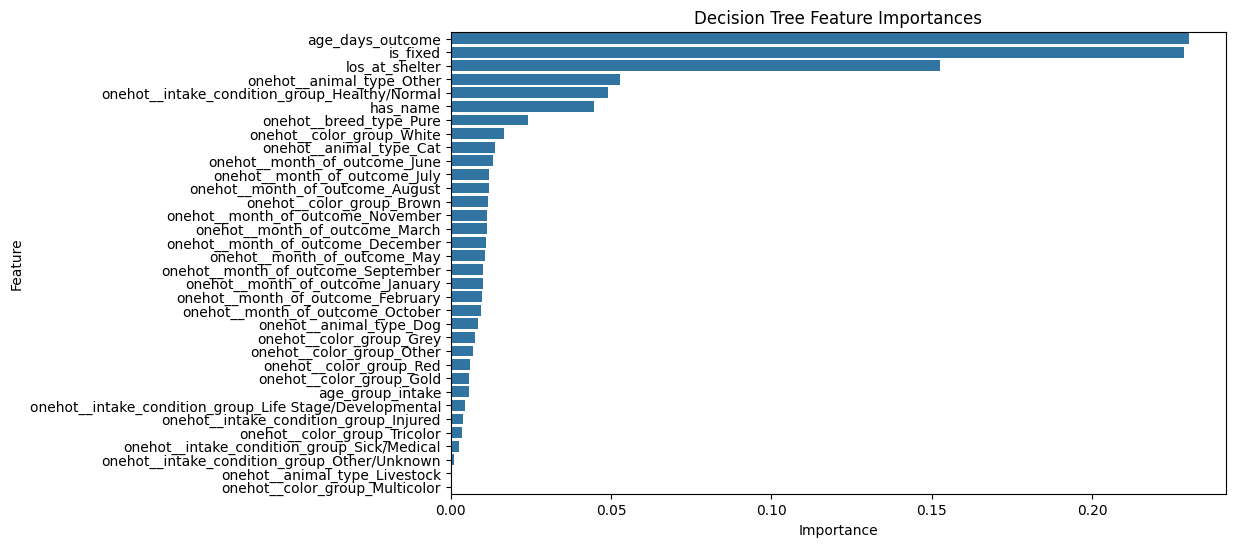

In [22]:
model = DecisionTreeClassifier(**best_dt_params, random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

CatBoost Classifier

In [23]:
optuna.logging.set_verbosity(optuna.logging.INFO)


In [24]:
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import accuracy_score

# Optuna Objective Function for Tuning CatBoost
def tune_catboost(trial):
    params = {
        'loss_function': 'MultiClass',    # Corrected syntax for loss function
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'iterations': trial.suggest_int('iterations', 100, 1000)
    }

    # Initialize CatBoost Model with Suggested Hyperparameters
    model = CatBoostClassifier(
        **params,
        random_seed=42,
        verbose=0,
        eval_metric='Accuracy'   # Evaluation metric for multiclass
    )

    # Train on Already Defined Splits
    model.fit(X_train, y_train)

    # Predict and Evaluate
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Optuna Study for Hyperparameter Tuning
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(tune_catboost, n_trials=30)

# Best Hyperparameters
best_catboost_params = study_catboost.best_params
print("\nBest CatBoost Hyperparameters:", best_catboost_params)


[I 2025-03-03 00:46:33,467] A new study created in memory with name: no-name-34a20436-7e43-480e-b400-2a76d61e4e57
[I 2025-03-03 00:46:38,636] Trial 0 finished with value: 0.7955726460195386 and parameters: {'learning_rate': 0.1833688535595625, 'depth': 5, 'l2_leaf_reg': 2.0670770853381972, 'bagging_temperature': 0.9042684174670719, 'iterations': 878}. Best is trial 0 with value: 0.7955726460195386.
[I 2025-03-03 00:46:40,100] Trial 1 finished with value: 0.7357098316358346 and parameters: {'learning_rate': 0.04332377571302373, 'depth': 5, 'l2_leaf_reg': 3.125777254601385, 'bagging_temperature': 0.08136435410335241, 'iterations': 229}. Best is trial 0 with value: 0.7955726460195386.
[I 2025-03-03 00:46:42,624] Trial 2 finished with value: 0.7870505092496363 and parameters: {'learning_rate': 0.22681816290370926, 'depth': 7, 'l2_leaf_reg': 7.884384548686447, 'bagging_temperature': 0.4645912272166207, 'iterations': 292}. Best is trial 0 with value: 0.7955726460195386.
[I 2025-03-03 00:46:4


Best CatBoost Hyperparameters: {'learning_rate': 0.18366553939455046, 'depth': 9, 'l2_leaf_reg': 1.1598842691079305, 'bagging_temperature': 0.33121618267553227, 'iterations': 783}


<ipython-input-25-d34ff3fa6d2b>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




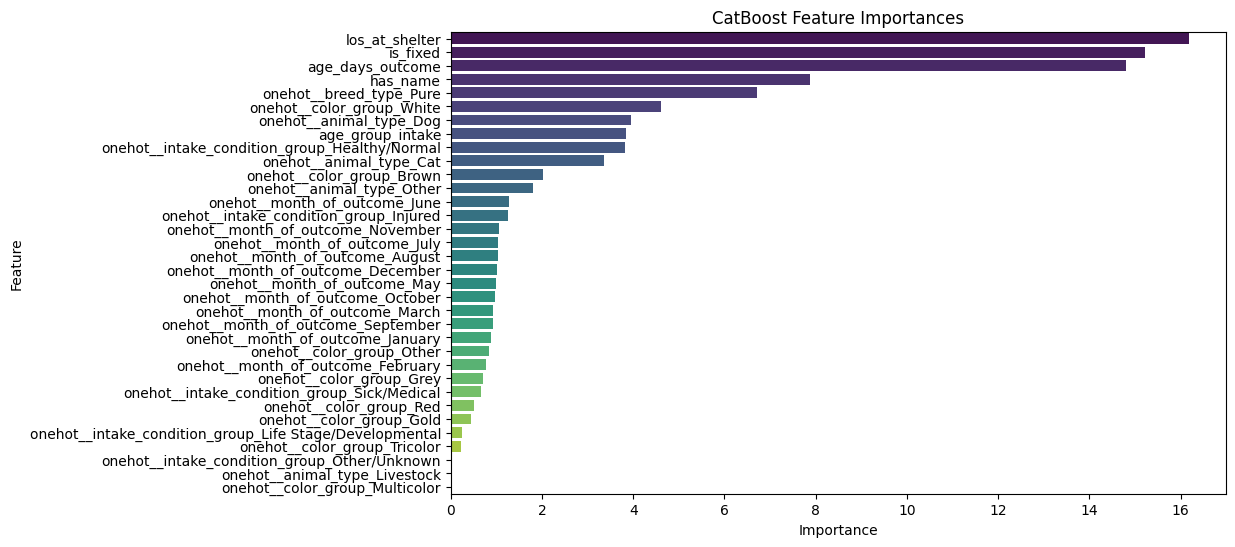

In [25]:
# Train CatBoost with Best Hyperparameters
model = CatBoostClassifier(
    **best_catboost_params,
    random_seed=42,
    verbose=0
).fit(X_train, y_train)

# Get Feature Importances from CatBoost
importances = model.get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame for Visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances Using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

TabNet Classifier

In [26]:
# import torch
# from pytorch_tabnet.tab_model import TabNetClassifier
# import optuna
# from optuna.logging import set_verbosity, WARNING


# # Optuna Objective Function for Tuning TabNet
# def tune_tabnet(trial):
#     params = {
#         'n_d': trial.suggest_int('n_d', 8, 64),
#         'n_a': trial.suggest_int('n_a', 8, 64),
#         'n_steps': trial.suggest_int('n_steps', 3, 10),
#         'gamma': trial.suggest_float('gamma', 1.0, 2.0),
#         'lambda_sparse': trial.suggest_float('lambda_sparse', 1e-5, 1e-3),
#         'mask_type': trial.suggest_categorical('mask_type', ['sparsemax', 'entmax']),
#         'optimizer_params': dict(lr=trial.suggest_float('lr', 1e-4, 1e-1, log=True))
#     }

#     # Initialize TabNet Classifier with Verbosity Enabled
#     model = TabNetClassifier(
#         **params,
#         verbose=1,              # Enable epoch-level progress
#         seed=42,
#         optimizer_fn=torch.optim.Adam,
#         device_name='cuda'      # Use GPU if available
#     )

#     # Train on Already Defined Splits
#     model.fit(
#         X_train.values,
#         y_train.values,
#         eval_set=[(X_test.values, y_test.values)],
#         eval_name=['valid'],
#         eval_metric=['accuracy'],
#         batch_size=4096,            # Batch size is specified here
#         virtual_batch_size=512,     # Virtual batch size is also specified here
#         max_epochs=100,             # Lower max epochs
#         patience=20,                # Early stopping patience
#         drop_last=False
#     )

#     # Predict and Evaluate
#     preds = model.predict(X_test.values)
#     accuracy = accuracy_score(y_test, preds)
#     return accuracy

# # Optuna Study for Hyperparameter Tuning with Progress Bar
# study_tabnet = optuna.create_study(direction='maximize')
# study_tabnet.optimize(tune_tabnet, n_trials=5, show_progress_bar=True)

# # Best Hyperparameters
# best_tabnet_params = study_tabnet.best_params
# print("\nBest TabNet Hyperparameters:", best_tabnet_params)


Best Hyperparameters for all models

In [27]:
# Train Models with Best Hyperparameters
rf_final = RandomForestClassifier(**best_rf_params, random_state=42).fit(X_train, y_train)
xgb_final = XGBClassifier(**best_xgb_params, random_state=42).fit(X_train, y_train)
dt_final = DecisionTreeClassifier(**best_dt_params, random_state=42).fit(X_train, y_train)
lgbm_final = LGBMClassifier(**best_lgbm_params, random_state=42, n_estimators=100).fit(X_train, y_train)
catboost_final = CatBoostClassifier(**best_catboost_params, random_seed=42, verbose=0).fit(X_train, y_train)


# Make Predictions
rf_preds = rf_final.predict(X_test)
xgb_preds = xgb_final.predict(X_test)
dt_preds = dt_final.predict(X_test)
lgbm_preds = lgbm_final.predict(X_test)
catboost_preds = catboost_final.predict(X_test)


# Store Best Hyperparameters
best_params = {
    'Random Forest': best_rf_params,
    'XGBoost': best_xgb_params,
    'Decision Tree': best_dt_params,
    'LightGBM': best_lgbm_params,
    'CatBoost': best_catboost_params
}

# Store Accuracy Scores
accuracy_scores = {
    'Random Forest': accuracy_score(y_test, rf_preds),
    'XGBoost': accuracy_score(y_test, xgb_preds),
    'Decision Tree': accuracy_score(y_test, dt_preds),
    'LightGBM': accuracy_score(y_test, lgbm_preds),
    'CatBoost': accuracy_score(y_test, catboost_preds)
}

# Display Model Performance and Best Hyperparameters
print("\nModel Performance and Best Hyperparameters:")
for model_name, acc in accuracy_scores.items():
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print("Best Hyperparameters:", best_params[model_name])


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004326 sec

In [28]:
# Class Mapping from Label Encoding
class_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

In [29]:

y_score = rf_final.predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

#ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#ROC curve for a specific class
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to get the actual class label
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], name=f"ROC curve of {class_label} (area = {roc_auc[i]:.2f})")

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(title_text="ROC Curves for Random Forest Classifier",
                  xaxis_range=[0,1],yaxis_range=[0,1])
fig.show()


In [30]:
# Get Prediction Probabilities from XGBoost Model
y_score = xgb_final.predict_proba(X_test)

# Binarize the Output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Curve Visualization with Class Labels
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to Get Actual Class Labels
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], mode='lines',
                    name=f"ROC curve of {class_label} (AUC = {roc_auc[i]:.2f})")

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for XGBoost Classifier",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Class"
)

fig.show()


In [31]:
# Get Prediction Probabilities from LightGBM Model
y_score = lgbm_model.predict_proba(X_test)

# Binarize the Output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Curve Visualization with Class Labels
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to Get Actual Class Labels
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], mode='lines',
                    name=f"ROC curve of {class_label} (AUC = {roc_auc[i]:.2f})")

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for LightGBM Classifier",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Class"
)

fig.show()


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


In [32]:
# Get Prediction Probabilities from Decision Tree Model
y_score = dt_final.predict_proba(X_test)

# Binarize the Output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Curve Visualization with Class Labels
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to Get Actual Class Labels
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i], mode='lines',
                    name=f"ROC curve of {class_label} (AUC = {roc_auc[i]:.2f})")

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for Decision Tree Classifier",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Class"
)

fig.show()


In [33]:
# Predict Probabilities with CatBoost
y_score = catboost_final.predict_proba(X_test)

# Binarize the Output for Multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for CatBoost
fig = px.line()
for i in range(n_classes):
    # Use class_mapping to get the actual class label
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i],
                    name=f"ROC curve of {class_label} (area = {roc_auc[i]:.2f})")

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(title_text="ROC Curves for CatBoost Classifier",
                  xaxis_range=[0,1],yaxis_range=[0,1])
fig.show()


In [34]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming rf_final, xgb_final, dt_final, and lgbm_model are already defined and trained
models = {
    'Random Forest': rf_final,
    'XGBoost': xgb_final,
    'Decision Tree': dt_final,
    'LightGBM': lgbm_model,
    'CatBoost': catboost_final
}

fig = go.Figure()

# Binarize the Labels for Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Plot ROC Curves for Each Model and Class
for model_name, model in models.items():
    y_probs = model.predict_proba(X_test)
    for i in range(n_classes):
        # Use class_mapping to Get Actual Class Labels
        class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found

        # Compute ROC Curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)

        # Add ROC Curve to the Plot
        fig.add_trace(go.Scatter(
            x=fpr, y=tpr, mode='lines',
            name=f'{model_name} - {class_label} (AUC = {roc_auc:.2f})'
        ))

# Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Axes and Layout
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(
    title_text="ROC Curves for All Models",
    xaxis_range=[0, 1],
    yaxis_range=[0, 1],
    legend_title_text="Model and Class"
)

fig.show()


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


## Ensemble Stacked Model

LightGBM + XGBoost + CatBoost Compliemntary models with Logistic Regression as the meta learner

In [35]:
!pip install joblib tqdm


In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import joblib
from tqdm import tqdm  # Optional: Progress Bar
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Different Meta-Models
meta_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='saga', penalty='l2', n_jobs=-1, verbose=1, warm_start=True, multi_class='multinomial'),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# Different Base Model Combinations
base_model_combinations = [
    [('lgbm', LGBMClassifier(**best_lgbm_params, random_state=42, verbose=1)),
     ('xgb', XGBClassifier(**best_xgb_params, random_state=42, verbosity=1)),
     ('catboost', CatBoostClassifier(**best_catboost_params, random_seed=42, logging_level='Silent'))],

    [('xgb', XGBClassifier(**best_xgb_params, random_state=42, verbosity=1)),
     ('rf', RandomForestClassifier(**best_rf_params, random_state=42, n_jobs=-1)),
     ('catboost', CatBoostClassifier(**best_catboost_params, random_seed=42, logging_level='Silent'))],

    [('lgbm', LGBMClassifier(**best_lgbm_params, random_state=42, verbose=1)),
     ('dt', DecisionTreeClassifier(**best_dt_params, random_state=42)),
     ('catboost', CatBoostClassifier(**best_catboost_params, random_seed=42, logging_level='Silent'))]
]

# Train and Evaluate Different Stacking Models
stacking_results = {}
for meta_name, meta_model in meta_models.items():
    for i, base_models in enumerate(base_model_combinations):
        print(f"\nTraining Stacking Model {i+1} with Meta-Model: {meta_name}")

        stacking_clf = StackingClassifier(
            estimators=base_models,
            final_estimator=meta_model,
            cv=5,  # Cross-validation for meta-model
            n_jobs=-1,
            stack_method='predict_proba'
        )

        # Train Base Models with Progress Bar
        for name, model in tqdm(base_models, desc=f"Training Base Models for {meta_name}"):
            model.fit(X_train, y_train)

        # Train Stacking Classifier
        stacking_clf.fit(X_train, y_train)

        # Make Predictions and Evaluate
        stacking_preds = stacking_clf.predict(X_test)
        stacking_accuracy = accuracy_score(y_test, stacking_preds)

        # Store Results
        stacking_results[f"{meta_name} - Combination {i+1}"] = stacking_accuracy

        print(f"\nStacking Model {i+1} with {meta_name} Accuracy: {stacking_accuracy:.4f}")

        # Cross-Validation Scores
        cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy')
        print("Cross-Validated Accuracy Scores:", cv_scores)
        print("Mean Accuracy:", cv_scores.mean())

        # Save Model
        model_filename = f'stacking_model_{meta_name.replace(" ", "_")}_comb_{i+1}.pkl'
        joblib.dump(stacking_clf, model_filename)
        print(f"\nStacking Model Saved as {model_filename}")

# Display All Results
print("\nFinal Stacking Model Performance Comparison:")
for model_name, acc in stacking_results.items():
    print(f"{model_name}: {acc:.4f}")



Training Stacking Model 1 with Meta-Model: Logistic Regression


Training Base Models for Logistic Regression:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004352 sec

Training Base Models for Logistic Regression: 100%|██████████| 3/3 [00:22<00:00,  7.45s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656

Stacking Model 1 with Logistic Regression Accuracy: 0.8390


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
Cross-Validated Accuracy Scores: [0.82369754 0.82369754 0.81811095 0.81512278 0.82616604]
Mean Accuracy: 0.8213589710276731

Stacking Model Saved as stacking_model_Logistic_Regression_comb_1.pkl

Training Stacking Model 2 with Meta-Model: Logistic Regression


Training Base Models for Logistic Regression: 100%|██████████| 3/3 [00:17<00:00,  5.92s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 1 seconds

Stacking Model 2 with Logistic Regression Accuracy: 0.8323


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 0 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 0 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 1 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 0 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 1 seconds
Cross-Validated Accuracy Scores: [0.81785111 0.81486293 0.81187476 0.81083539 0.81876056]
Mean Accuracy: 0.814836949460829

Stacking Model Saved as stacking_model_Logistic_Regression_comb_2.pkl

Training Stacking Model 3 with Meta-Model: Logistic Regression


Training Base Models for Logistic Regression:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004867 sec

Training Base Models for Logistic Regression: 100%|██████████| 3/3 [00:22<00:00,  7.48s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656

Stacking Model 3 with Logistic Regression Accuracy: 0.8385


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 27 epochs took 0 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 28 epochs took 1 seconds
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
Cross-Validated Accuracy Scores: [0.82577628 0.8227881  0.81954008 0.81824087 0.82499675]
Mean Accuracy: 0.8222684162660776

Stacking Model Saved as stacking_model_Logistic_Regression_comb_3.pkl

Training Stacking Model 1 with Meta-Model: Support Vector Machine


Training Base Models for Support Vector Machine:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004429 sec

Training Base Models for Support Vector Machine: 100%|██████████| 3/3 [00:23<00:00,  7.96s/it]


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656

Stacking Model 1 with Support Vector Machine Accuracy: 0.8439
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightG

Training Base Models for Support Vector Machine: 100%|██████████| 3/3 [00:17<00:00,  5.89s/it]



Stacking Model 2 with Support Vector Machine Accuracy: 0.8387
Cross-Validated Accuracy Scores: [0.82447707 0.82031961 0.81577238 0.81460309 0.82200857]
Mean Accuracy: 0.8194361439521891

Stacking Model Saved as stacking_model_Support_Vector_Machine_comb_2.pkl

Training Stacking Model 3 with Meta-Model: Support Vector Machine


Training Base Models for Support Vector Machine:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004204 sec

Training Base Models for Support Vector Machine: 100%|██████████| 3/3 [00:20<00:00,  6.83s/it]


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656

Stacking Model 3 with Support Vector Machine Accuracy: 0.8433
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightG

Training Base Models for Random Forest:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 sec

Training Base Models for Random Forest: 100%|██████████| 3/3 [00:24<00:00,  8.02s/it]


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656

Stacking Model 1 with Random Forest Accuracy: 0.8336
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warn

Training Base Models for Random Forest: 100%|██████████| 3/3 [00:17<00:00,  5.87s/it]



Stacking Model 2 with Random Forest Accuracy: 0.8255
Cross-Validated Accuracy Scores: [0.81538262 0.81005587 0.80992595 0.80719761 0.81928024]
Mean Accuracy: 0.8123684552423022

Stacking Model Saved as stacking_model_Random_Forest_comb_2.pkl

Training Stacking Model 3 with Meta-Model: Random Forest


Training Base Models for Random Forest:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004250 sec

Training Base Models for Random Forest: 100%|██████████| 3/3 [00:21<00:00,  7.25s/it]


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656

Stacking Model 3 with Random Forest Accuracy: 0.8354
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47078436497155735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47078436497155735
[LightGBM] [Warning] bagging_fraction is set=0.8647396028800656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8647396028800656
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warn

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import plotly.express as px

# Predict Probabilities with Stacking Classifier
y_score = stacking_clf.predict_proba(X_test)

# Binarize the Output for Multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# ROC Curve and AUC for Each Class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for Stacking Ensemble Model
fig = px.line()

for i in range(n_classes):
    # Use class_mapping to get the actual class label
    class_label = class_mapping.get(i, f"Class {i}")  # Default to "Class i" if not found
    fig.add_scatter(x=fpr[i], y=tpr[i],
                    name=f"ROC curve of {class_label} (area = {roc_auc[i]:.2f})")

# Add Diagonal Line for Random Classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update Layout for Better Visualization
fig.update_xaxes(title_text="False Positive Rate")
fig.update_yaxes(title_text="True Positive Rate")
fig.update_layout(title_text="ROC Curves for Stacking Ensemble Model",
                  xaxis_range=[0, 1], yaxis_range=[0, 1])

# Show Plot
fig.show()


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.767807552541902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.767807552541902
[LightGBM] [Warning] bagging_fraction is set=0.7822609762065069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822609762065069


## SHAP

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Add Stacking Classifier to the Models Dictionary
models = {
    'Random Forest': rf_final,
    'XGBoost': xgb_final,
    'Decision Tree': dt_final,
    'LightGBM': lgbm_model,
    'Stacking Ensemble': stacking_clf  # Adding Stacking Model
}

for model_name, model in models.items():
    print(f"\nCalculating SHAP values for {model_name}...")

    # Use TreeExplainer for Tree-based Models
    if model_name in ['Random Forest', 'XGBoost', 'Decision Tree', 'LightGBM']:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

    # Use KernelExplainer for Stacking Ensemble
    elif model_name == 'Stacking Ensemble':
        # Sample a subset for KernelExplainer to reduce computation time
        sample_idx = np.random.choice(X_train.index, size=100, replace=False)
        X_sample = X_train.loc[sample_idx]

        explainer = shap.KernelExplainer(model.predict_proba, X_sample)
        shap_values = explainer.shap_values(X_sample)

    # SHAP Summary Plot for Each Model
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
    plt.title(f'SHAP Summary Plot for {model_name}')
    plt.show()



Calculating SHAP values for Random Forest...
